## <center> **OCD Risk Classification using Psychological Self-Assessment Data**

### **Project Overview**

##### This project aims to analyze self-assessment psychological data to explore behavioral patterns related to Obsessive-Compulsive Disorder (OCD). 
##### Using 9 core OCD dimensions, we aim to:
##### 1. Perform an in-depth Exploratory Data Analysis (EDA).
##### 2. Build a machine learning model to predict OCD risk level (Low, Moderate, High) using just 9 selected questions (1 from each dimension).
##### 3. Create a Streamlit-based interactive dashboard for prediction and individual-level analysis.

##### **Dataset**: Self-collected Google Form data (110+ responses)
##### **Scale**: Responses are rated from 0 to 4 (0 = Never, 4 = Always)
##### **Target**: OCD Risk Level (Low, Moderate, High)

### **Import Important Libraries (Dependencies) and Loading the Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('OCD_Prepared_Data.csv')

### **Exploratory Data Analysis (EDA): Data Exploration / Data Understanding**

In [3]:
df.head() # Displays the preview of the data

,Age,Gender,Current Education Level,Occupation / Field of Study,Country or Region,Contamination_and_Washing,Checking_Behavior,Ordering/Symmetry,Hoarding/Collecting,Intrusive_Thoughts,Mental_Compulsions_and_Rituals,Avoidance_Behavior,Emotional_Awareness_and_Insights,Functioning_Behavior,ocd_overall_score,has_ocd
0,21,Female,Undergraduate,Artificial Intelligence,Pakistan,1.6,2.6,1.6,3.50,1.4,0.75,1.666667,2.666667,1.8,1.953704,1
1,20,Male,Undergraduate,Artificial Intelligence,Pakistan,1.0,2.8,0.8,1.00,2.8,3.00,1.000000,1.666667,1.4,1.718519,1
2,21,Female,Undergraduate,Artificial Intelligence,Pakistan,1.8,2.2,3.0,0.50,1.0,1.00,1.333333,3.000000,1.6,1.714815,1
3,20,Male,Undergraduate,Artificial Intelligence,Pakistan,0.6,1.8,1.2,1.75,1.4,0.25,0.333333,0.666667,0.0,0.888889,0
4,19,Male,Undergraduate,Artificial Intelligence,Pakistan,2.4,2.6,3.0,1.50,1.0,2.25,2.000000,2.333333,1.2,2.031481,1


In [4]:
df.tail() # Displays the last 5 rows of the dataframe

,Age,Gender,Current Education Level,Occupation / Field of Study,Country or Region,Contamination_and_Washing,Checking_Behavior,Ordering/Symmetry,Hoarding/Collecting,Intrusive_Thoughts,Mental_Compulsions_and_Rituals,Avoidance_Behavior,Emotional_Awareness_and_Insights,Functioning_Behavior,ocd_overall_score,has_ocd
113,18,Female,Undergraduate,Software Engineering,Pakistan,3.6,4.0,3.0,3.75,4.0,3.75,2.333333,4.000000,3.6,3.559259,2
114,22,Female,Undergraduate,Artificial Intelligence,Pakistan,3.4,4.0,3.2,1.00,0.4,4.00,4.000000,0.666667,2.0,2.518519,1
115,20,Male,Undergraduate,Artificial Intelligence,Pakistan,0.4,0.0,2.4,2.00,1.4,1.25,0.333333,1.000000,0.0,0.975926,0
116,21,Female,Undergraduate,Artificial Intelligence,Pakistan,0.8,2.6,2.0,2.75,2.2,3.00,1.000000,1.000000,0.0,1.705556,1
117,20,Male,Undergraduate,Artificial Intelligence,Pakistan,2.4,0.4,0.6,2.25,0.8,1.50,2.000000,0.666667,0.6,1.246296,0


In [5]:
df.info() # Displays the brief summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               118 non-null    int64  
 1   Gender                            118 non-null    object 
 2   Current Education Level           118 non-null    object 
 3   Occupation / Field of Study       118 non-null    object 
 4   Country or Region                 118 non-null    object 
 5   Contamination_and_Washing         118 non-null    float64
 6   Checking_Behavior                 118 non-null    float64
 7   Ordering/Symmetry                 118 non-null    float64
 8   Hoarding/Collecting               118 non-null    float64
 9   Intrusive_Thoughts                118 non-null    float64
 10  Mental_Compulsions_and_Rituals    118 non-null    float64
 11  Avoidance_Behavior                118 non-null    float64
 12  Emotiona

In [6]:
df.shape # Displays the size of rows and columns of the dataframe

(118, 16)

In [7]:
df.describe() # Displays overall statistical summary of the dataframe (Numerical Columns)

,Age,Contamination_and_Washing,Checking_Behavior,Ordering/Symmetry,Hoarding/Collecting,Intrusive_Thoughts,Mental_Compulsions_and_Rituals,Avoidance_Behavior,Emotional_Awareness_and_Insights,Functioning_Behavior,ocd_overall_score,has_ocd
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,22.872881,2.010169,2.225424,2.033898,2.114407,2.016949,1.951271,1.833333,2.310734,1.591525,2.009746,0.864407
std,5.947845,0.979743,1.081166,1.048990,1.069010,1.147744,1.063305,1.048447,1.291163,1.106127,0.800805,0.625870
min,16.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.364815,0.000000
25%,20.000000,1.400000,1.450000,1.000000,1.250000,1.200000,1.250000,1.000000,1.333333,0.600000,1.452778,0.000000
50%,21.000000,2.000000,2.300000,2.100000,2.000000,2.000000,2.000000,2.000000,2.500000,1.600000,2.037037,1.000000
75%,23.000000,2.750000,3.000000,2.950000,3.000000,3.000000,2.750000,2.333333,3.333333,2.200000,2.532407,1.000000
max,59.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.940741,2.000000


In [8]:
df.describe(include='object') # Displays overall statistical summary of the dataframe (Categorical Columns)

,Gender,Current Education Level,Occupation / Field of Study,Country or Region
count,118,118,118,118
unique,2,5,25,3
top,Female,Undergraduate,Computer Sciences,Pakistan
freq,65,83,41,113


In [9]:
df.isnull().sum() # Checks for missing/null values in the dataframe

Age                                 0
Gender                              0
Current Education Level             0
Occupation / Field of Study         0
Country or Region                   0
Contamination_and_Washing           0
Checking_Behavior                   0
Ordering/Symmetry                   0
Hoarding/Collecting                 0
Intrusive_Thoughts                  0
Mental_Compulsions_and_Rituals      0
Avoidance_Behavior                  0
Emotional_Awareness_and_Insights    0
Functioning_Behavior                0
ocd_overall_score                   0
has_ocd                             0
dtype: int64

In [10]:
print(df.duplicated().sum()) # Checks for duplicate values in the dataframe

0


In [11]:
df['has_ocd'].value_counts() # Calculates target column value counts

has_ocd
1    70
0    32
2    16
Name: count, dtype: int64

In [12]:
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    print(f"Unique values in '{col}':\n{df[col].unique()}\n")

Unique values in 'Gender':
['Female' 'Male']

Unique values in 'Current Education Level':
['Undergraduate' 'Graduate' 'Intermediate / A-Levels' 'Post-Graduate'
 'Matric / O-Levels']

Unique values in 'Occupation / Field of Study':
['Artificial Intelligence' 'Software Engineering'
 'Business Administration' 'Computer Sciences' 'UI/UX Design'
 'Computer Science' 'Dentistry' 'Accounting and Finance'
 'Human Nutrition and Dietetics' 'Medical Sciences' 'Data Science'
 'Doctor of Physical Therapy' 'Mathematics' 'Project Management' 'Student'
 'Applied Sciences' 'Housewife' 'Pharmacy' 'Chemistry' 'Basic Sciences'
 'Doctor of Medicine and Surgery' 'Textile Design' 'Public Administration'
 'Unemployed' 'Information Technology']

Unique values in 'Country or Region':
['Pakistan' 'Afghanistan' 'Taiwan']



### **Data Cleaning**

##### Data Cleaning was performed during "Data Preparation and Preprocessing" phase after collecting data. Following techniques were applied to prepare a clean dataset:
 - ##### Dropped irrelevant columns such as Row ID, Timestamp, consent, and PowerApps ID.
 - ##### Renamed all 45 OCD-related questions into structured, readable column names grouped under 9 OCD dimensions.
 - ##### Created average scores for each OCD dimension to reduce feature count and align with the goal of using 9 key questions.
 - ##### Cleaned categorical columns like "Country or Region" and "Occupation / Field of Study" by standardizing variants (e.g., "pakistan", "PK", "BS AI", "AI", "BS-AI") to a single format.
 - ##### Handled demographic fields (Age, Gender, Education Level, Field of Study) — cleaned and retained for future use.
 - ##### Defined ternary target labels (Low, Moderate, High OCD risk) based on the average score across all dimensions.

### **Data Visualization**

In [13]:
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)

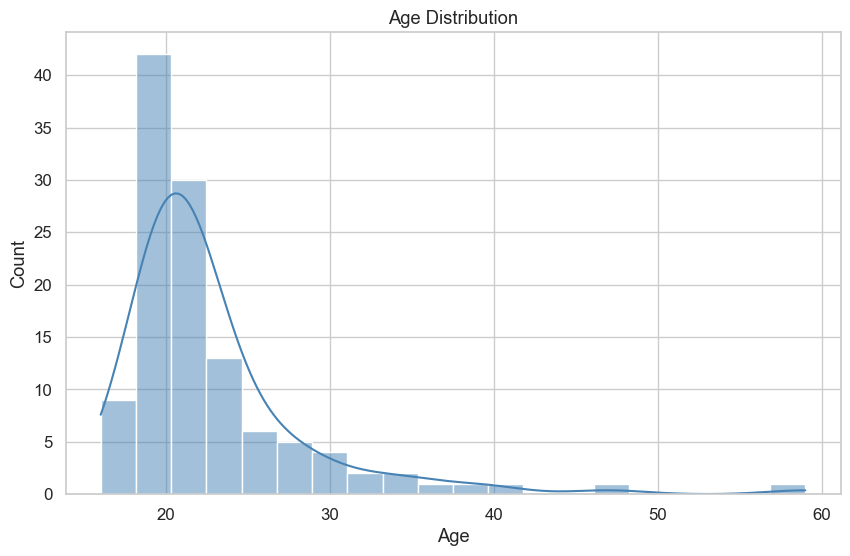

In [14]:
plt.figure()
sns.histplot(df['Age'], bins=20, kde=True, color='steelblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

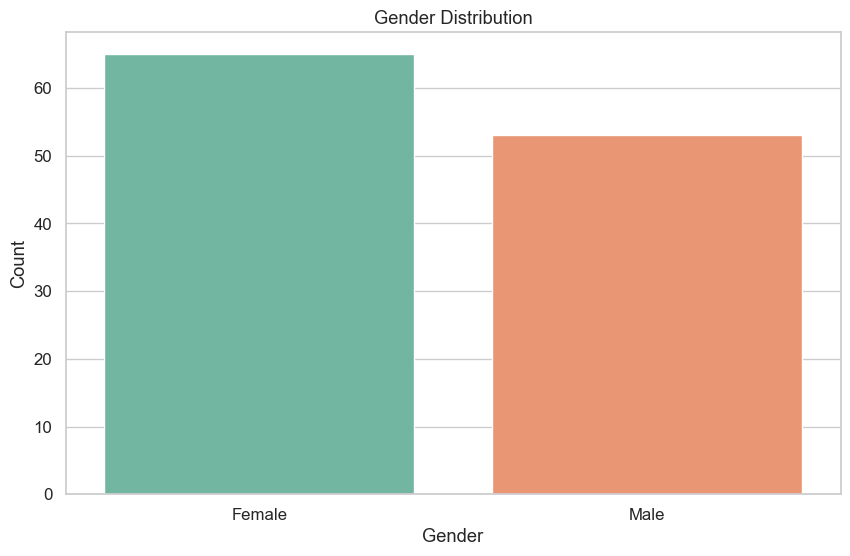

In [15]:
plt.figure()
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

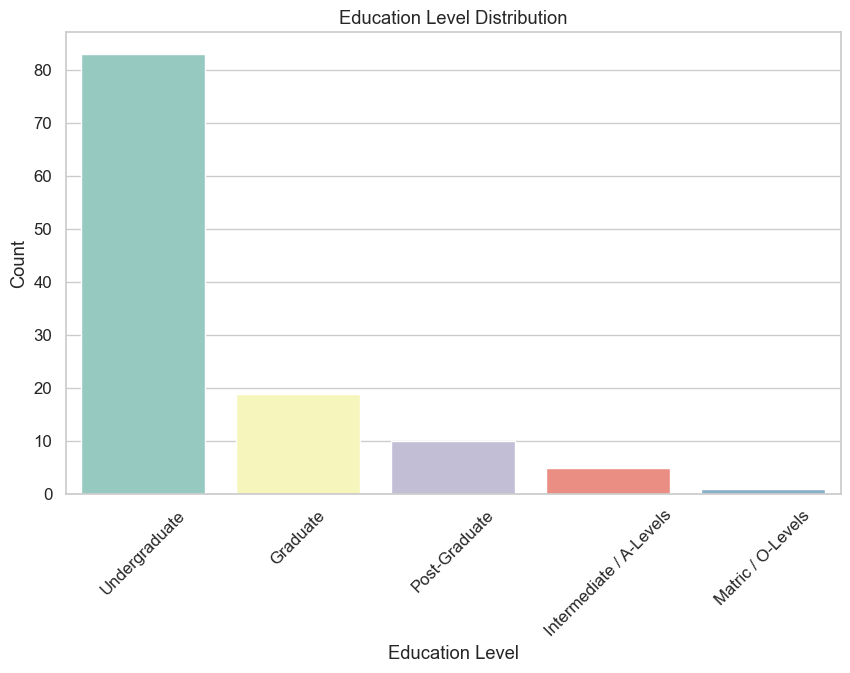

In [16]:
plt.figure()
sns.countplot(data=df, x='Current Education Level', palette='Set3', order=df['Current Education Level'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

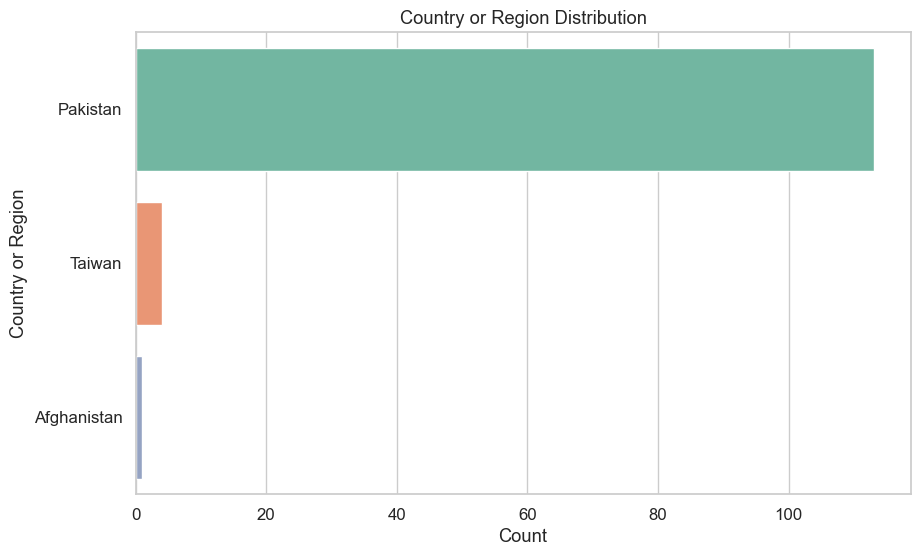

In [17]:
plt.figure()
sns.countplot(data=df, y='Country or Region', palette='Set2', order=df['Country or Region'].value_counts().index)
plt.title('Country or Region Distribution')
plt.xlabel('Count')
plt.ylabel('Country or Region')
plt.show()

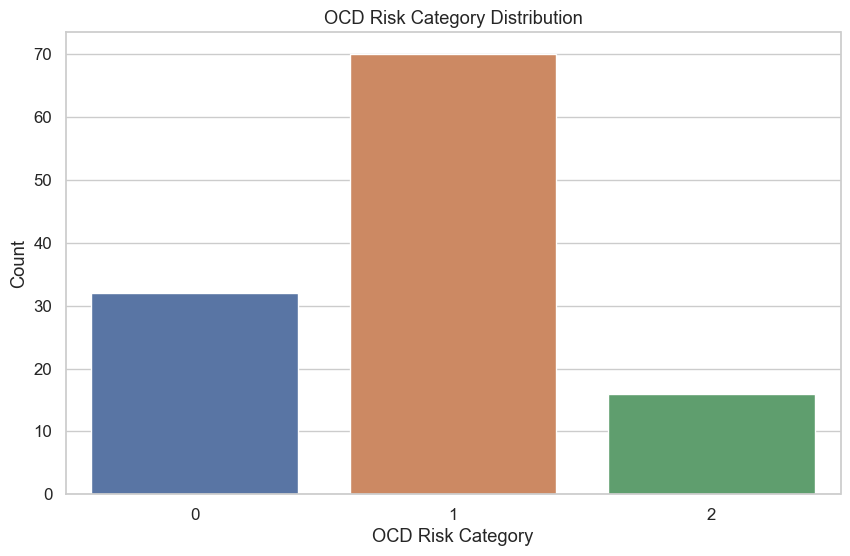

In [18]:
plt.figure()
sns.countplot(data=df, x='has_ocd', palette='deep')
plt.title('OCD Risk Category Distribution')
plt.xlabel('OCD Risk Category')
plt.ylabel('Count')
plt.show()

In [19]:
dimensions = [
    'Contamination_and_Washing','Checking_Behavior', 'Ordering/Symmetry', 'Hoarding/Collecting', 'Intrusive_Thoughts',
    'Mental_Compulsions_and_Rituals', 'Avoidance_Behavior', 'Emotional_Awareness_and_Insights', 'Functioning_Behavior']

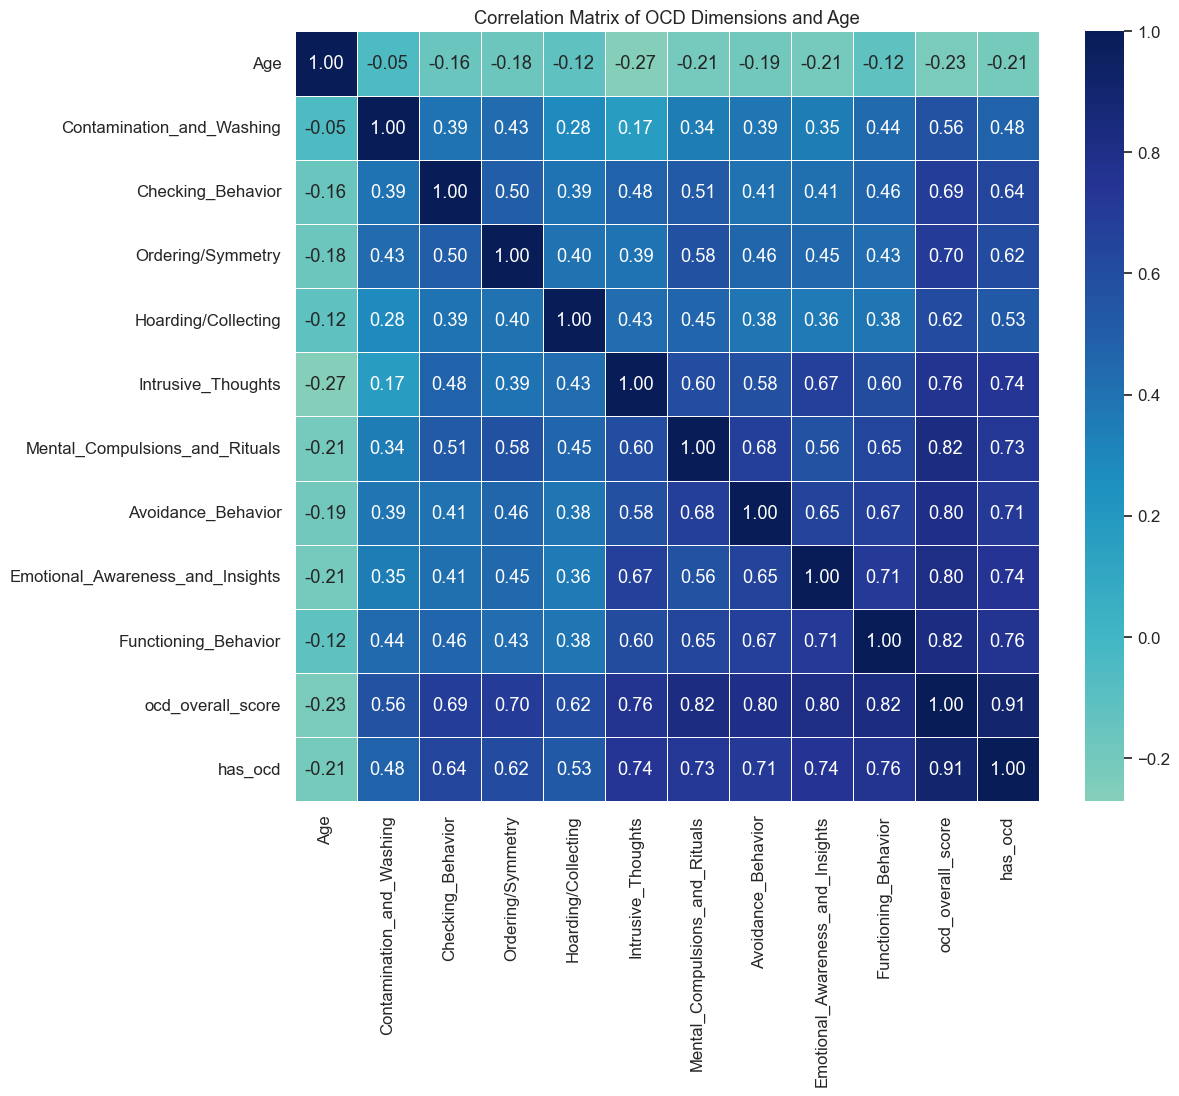

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='YlGnBu', center=0, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of OCD Dimensions and Age')
plt.show()

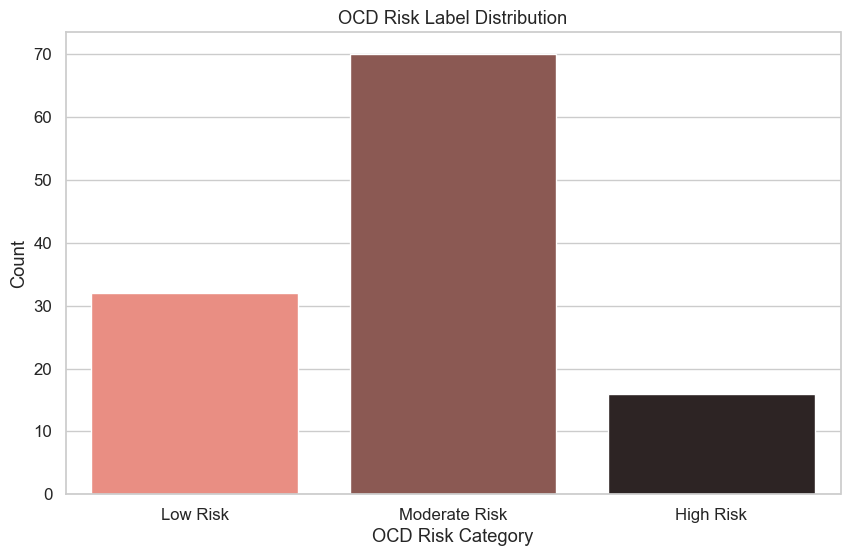

In [21]:
sns.countplot(data=df, x='has_ocd', palette='dark:salmon_r')
plt.title('OCD Risk Label Distribution')
plt.xlabel('OCD Risk Category')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Low Risk', 'Moderate Risk', 'High Risk'])
plt.show()

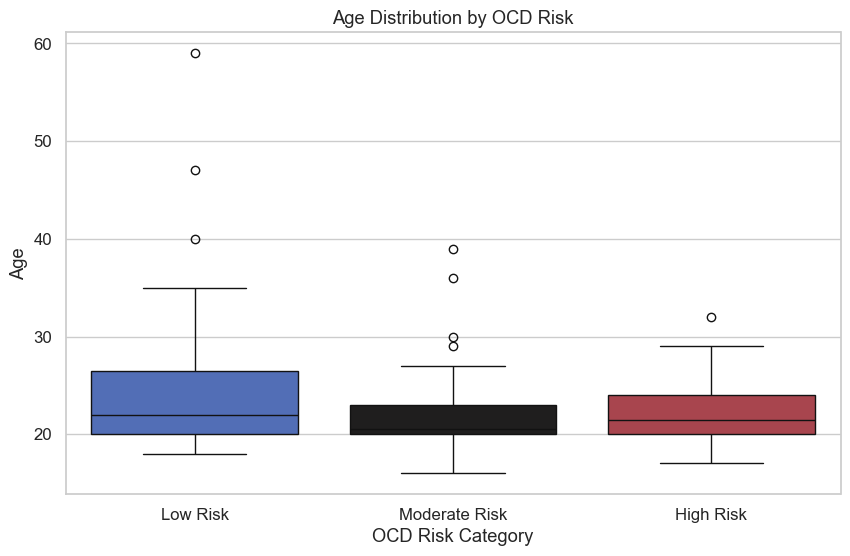

In [22]:
sns.boxplot(data=df, x='has_ocd', y='Age', palette='icefire')
plt.title('Age Distribution by OCD Risk')
plt.xlabel('OCD Risk Category')
plt.ylabel('Age')
plt.xticks([0, 1, 2], ['Low Risk', 'Moderate Risk', 'High Risk'])
plt.show()

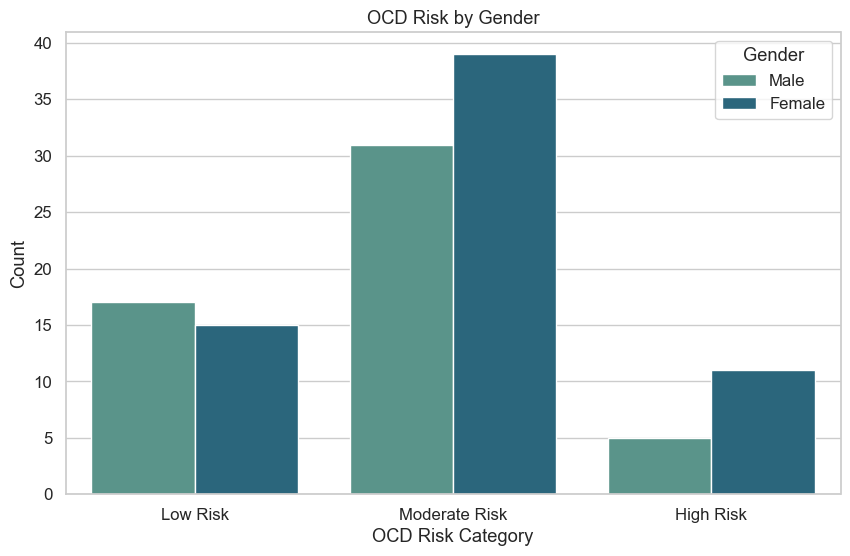

In [23]:
sns.countplot(data=df, x='has_ocd', hue='Gender', palette='crest')
plt.title('OCD Risk by Gender')
plt.xlabel('OCD Risk Category')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Low Risk', 'Moderate Risk', 'High Risk'])
plt.legend(title='Gender')
plt.show()

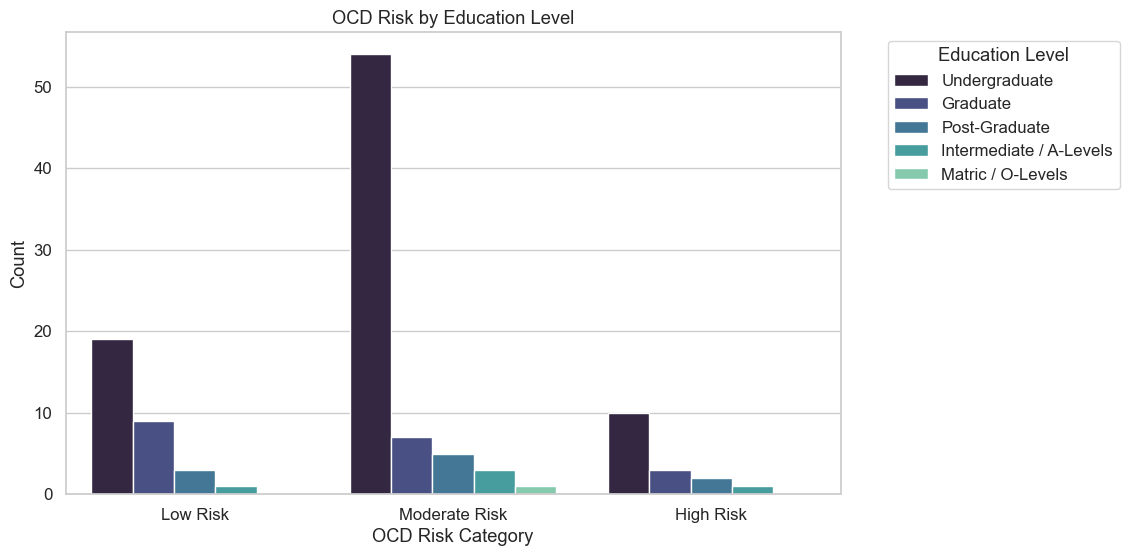

In [24]:
sns.countplot(data=df, x='has_ocd', hue='Current Education Level', palette='mako')
plt.title('OCD Risk by Education Level')
plt.xlabel('OCD Risk Category')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Low Risk', 'Moderate Risk', 'High Risk'])
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

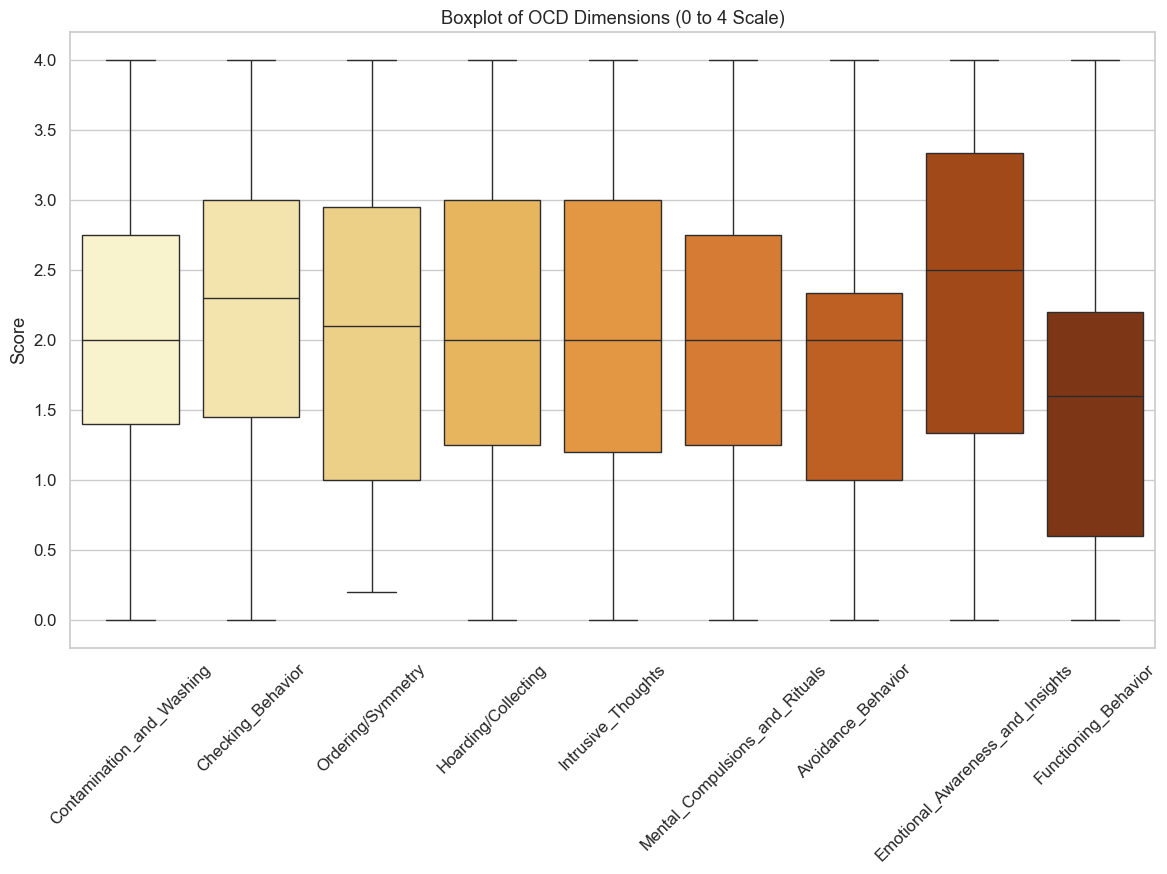

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[dimensions], palette="YlOrBr")
plt.title("Boxplot of OCD Dimensions (0 to 4 Scale)")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.show()

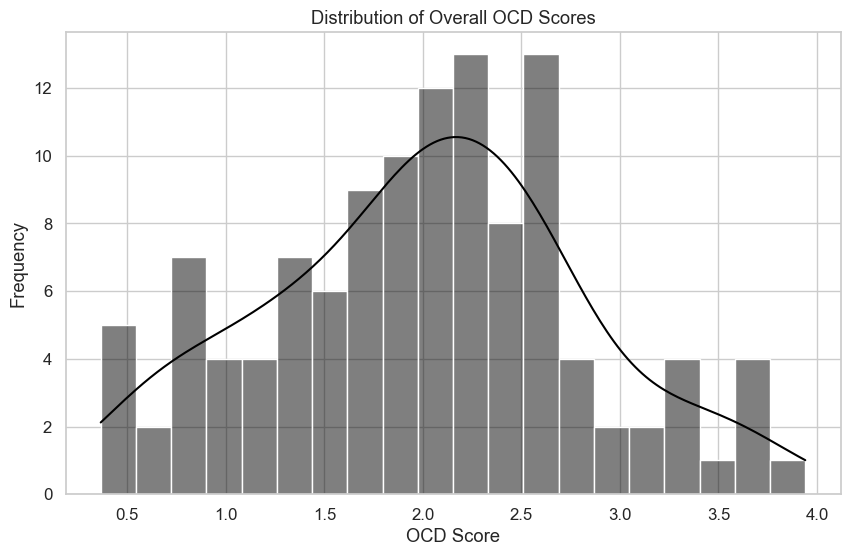

In [26]:
sns.histplot(data=df, x='ocd_overall_score', kde=True, bins=20, color='black')
plt.title("Distribution of Overall OCD Scores")
plt.xlabel("OCD Score")
plt.ylabel("Frequency")
plt.show()

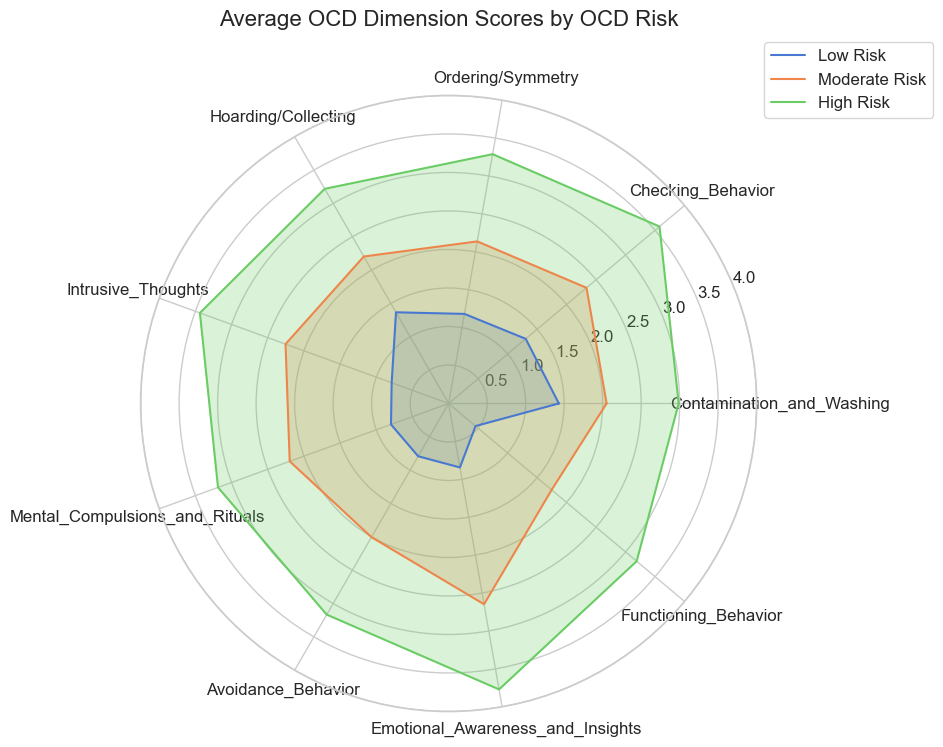

In [27]:
def radar_plot(df_radar, categories, title):
    labels = np.array(categories)
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # close loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for idx, row in df_radar.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, label=idx)
        ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 4)
    ax.set_title(title, size=16, y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Create data
radar_data = df.groupby('has_ocd')[dimensions].mean()
radar_data.index = ['Low Risk', 'Moderate Risk', 'High Risk']
radar_plot(radar_data, dimensions, "Average OCD Dimension Scores by OCD Risk")

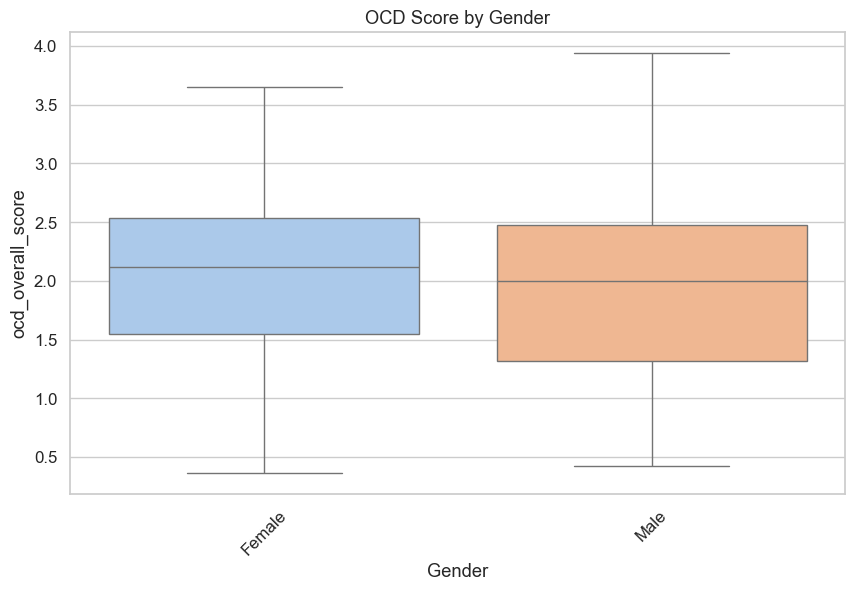

In [28]:
sns.boxplot(data=df, x='Gender', y='ocd_overall_score', palette='pastel')
plt.title('OCD Score by Gender')
plt.xticks(rotation=45)
plt.show()

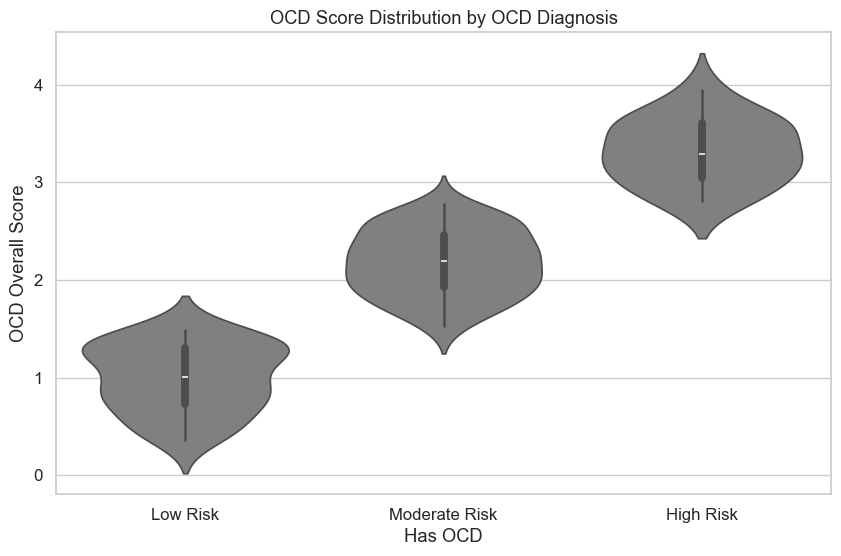

In [29]:
sns.violinplot(data=df, x='has_ocd', y='ocd_overall_score', color='grey')
plt.title('OCD Score Distribution by OCD Diagnosis')
plt.xlabel('Has OCD')
plt.xticks([0, 1, 2], ['Low Risk', 'Moderate Risk', 'High Risk'])
plt.ylabel('OCD Overall Score')
plt.show()

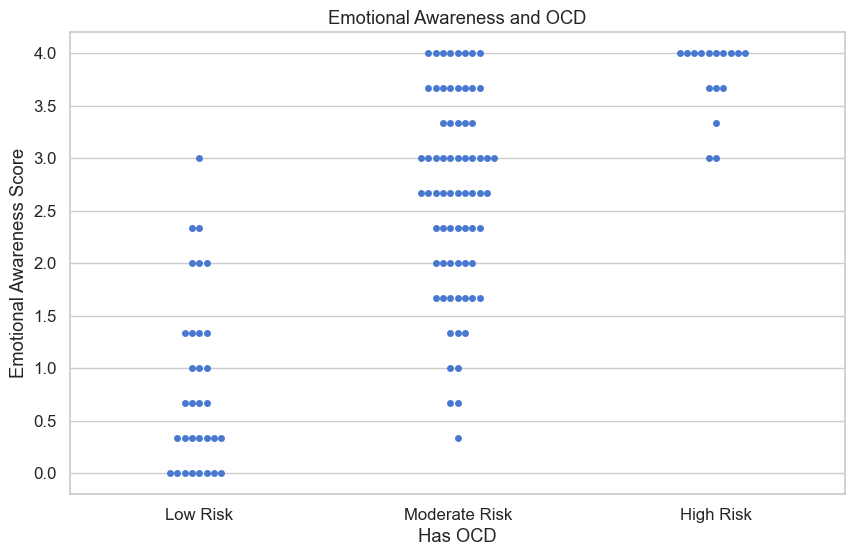

In [30]:
sns.swarmplot(data=df, x='has_ocd', y='Emotional_Awareness_and_Insights')
plt.title('Emotional Awareness and OCD')
plt.xlabel('Has OCD')
plt.xticks([0, 1, 2], ['Low Risk', 'Moderate Risk', 'High Risk'])
plt.ylabel('Emotional Awareness Score')
plt.show()

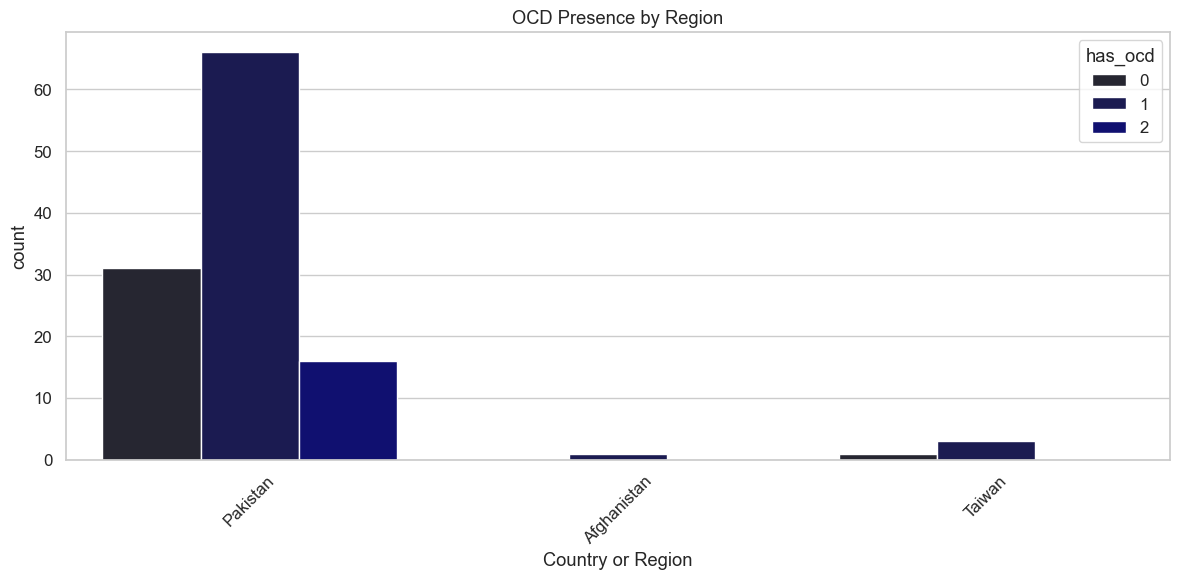

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Country or Region', hue='has_ocd', color='navy')
plt.title('OCD Presence by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

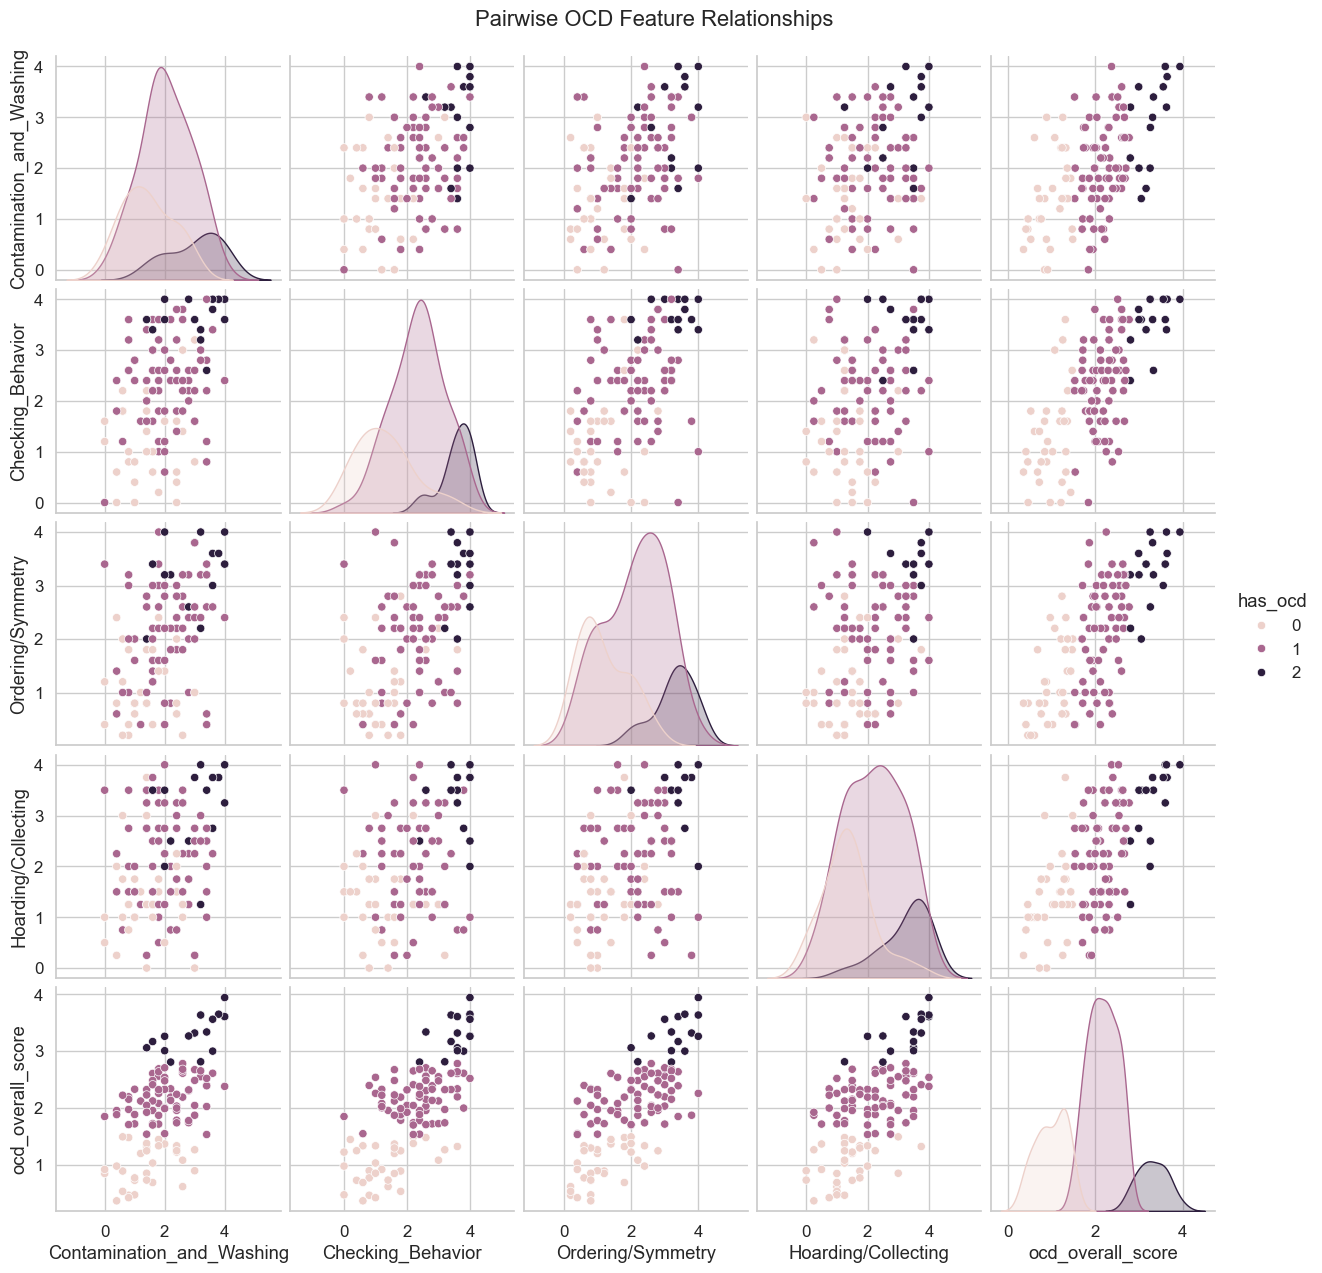

In [32]:
selected_cols = ['Contamination_and_Washing', 'Checking_Behavior',
                 'Ordering/Symmetry', 'Hoarding/Collecting', 'ocd_overall_score', 'has_ocd']

sns.pairplot(df[selected_cols], hue='has_ocd')
plt.suptitle('Pairwise OCD Feature Relationships', y=1.02)
plt.show()

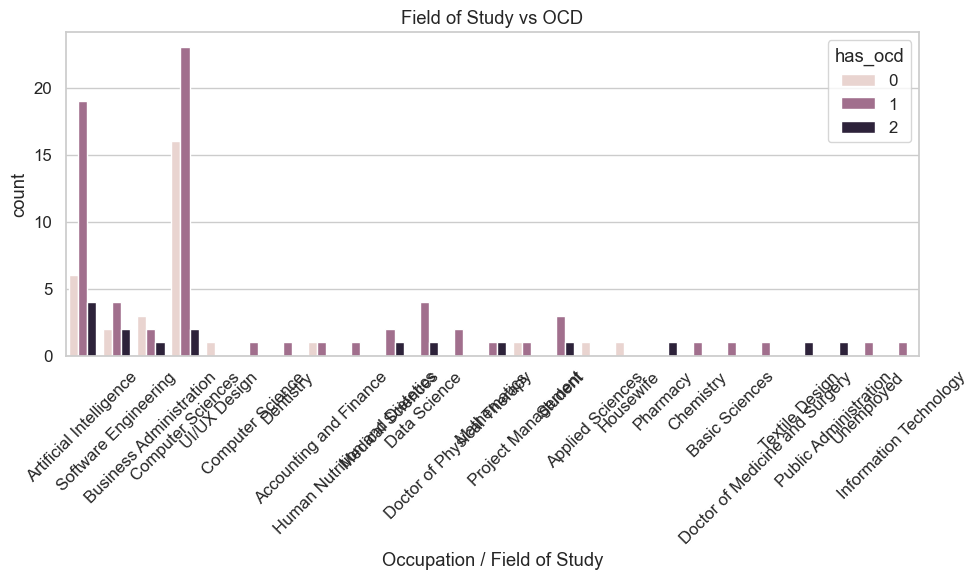

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Occupation / Field of Study', hue='has_ocd')
plt.title('Field of Study vs OCD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Feature Engineering & Modelling**

In [34]:
# Define target and features
X = df.drop(columns=["Occupation / Field of Study", "Country or Region", "has_ocd", "ocd_overall_score"])
y = df["has_ocd"]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
import joblib


# Identify categorical and numerical columns
categorical_cols = ["Gender", "Current Education Level"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Apply transformation to training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
joblib.dump(preprocessor, "preprocessor.pkl")

['preprocessor.pkl']

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_train_transformed, y_train)

preds = model.predict(X_test_transformed)

preds_train = model.predict(X_train_transformed)

print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_score(y_test, preds) * 100))
print("Training Logistic Regression Accuracy: {:.2f}%".format(accuracy_score(y_train, preds_train) * 100))
joblib.dump(model, "logistic_model.pkl")

Logistic Regression Accuracy: 95.83%
Training Logistic Regression Accuracy: 97.87%


['logistic_model.pkl']

In [44]:
import pandas as pd
import joblib

# === Step 1: Load Pre-trained Artifacts ===
preprocessor = joblib.load("preprocessor.pkl")
model = joblib.load("logistic_model.pkl")

# === Step 2: Define Constants ===
likert_scale = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Often": 3,
    "Always": 4
}

gender_options = ["Male", "Female", "Prefer not to say"]
education_options = [
    "Matric / O-Levels", "Intermediate / A-Levels", "Undergraduate",
    "Graduate", "Post-Graduate", "Other"
]

ocd_questions = {
    "Contamination_and_Washing": "1. Do you excessively wash or clean due to contamination fears? ",
    "Checking_Behavior": "2. Do you repeatedly check things like locks or switches? ",
    "Ordering/Symmetry": "3. Do you feel the need to arrange things in a specific order or symmetry? ",
    "Hoarding/Collecting": "4. Do you have difficulty discarding items, even useless ones? ",
    "Intrusive_Thoughts": "5. Do you experience unwanted intrusive thoughts? ",
    "Mental_Compulsions_and_Rituals": "6. Do you perform mental rituals (like counting/praying) to reduce anxiety? ",
    "Avoidance_Behavior": "7. Do you avoid people, places, or things to prevent anxiety or distress? ",
    "Emotional_Awareness_and_Insights": "8. Do you recognize that your thoughts/behaviors are excessive or unreasonable? ",
    "Functioning_Behavior": "9. Have these behaviors affected your daily functioning (school, work, social life)? "
}

# === Step 3: Collect Input ===
print("🔹 Please answer the following questions honestly:\n")
user_input = {}

# Demographics
user_input["Age"] = int(input("Enter your age: "))
user_input["Gender"] = input(f"Enter your gender {gender_options}: ")
user_input["Current Education Level"] = input(f"Enter your education level {education_options}: ")

# OCD Dimension Scores
print("\n🔹 Respond with: Never, Rarely, Sometimes, Often, Always\n")
for key, question in ocd_questions.items():
    response = input(question)
    while response not in likert_scale:
        print("❌ Invalid input. Please choose from: Never, Rarely, Sometimes, Often, Always.")
        response = input(question)
    user_input[key] = likert_scale[response]

# === Step 4: Transform Input ===
input_df = pd.DataFrame([user_input])
input_transformed = preprocessor.transform(input_df)

# === Step 5: Predict ===
prediction = model.predict(input_transformed)[0]
prediction_proba = model.predict_proba(input_transformed)[0]

# === Step 6: Output Diagnosis ===
print("\n🔎 Early Diagnosis Result:")
if prediction == 2:
    print("📌 The individual is at **High Risk** of having OCD.")
elif prediction == 1:
    print("📌 The individual is at **Moderate Risk** of having OCD.")
else:
    print("📌 The individual is at **Low Risk/No Risk** of having OCD.")

print(f"\n🧮 Probability Breakdown:")
print(f"🔴 High Risk: {prediction_proba[2] * 100:.2f}%")
print(f"🟡 Moderate Risk: {prediction_proba[1] * 100:.2f}%")
print(f"🟢 Low/No Risk: {prediction_proba[0] * 100:.2f}%")

# === Step 7: OCD Dimension Analysis ===
print("\n📊 OCD Dimension Scores & Risk Levels:")
for dimension, score in user_input.items():
    if dimension in ["Gender", "Current Education Level", "Age"]:
        continue
    if score > 2.8:
        risk = "⚠️ High Concern"
    elif score > 1.5:
        risk = "🟡 Moderate"
    else:
        risk = "🟢 Low"
    print(f"{dimension.replace('_', ' ')}: {score} → {risk}")

🔹 Please answer the following questions honestly:



Enter your age:  29
Enter your gender ['Male', 'Female', 'Prefer not to say']:  Female
Enter your education level ['Matric / O-Levels', 'Intermediate / A-Levels', 'Undergraduate', 'Graduate', 'Post-Graduate', 'Other']:  Graduate



🔹 Respond with: Never, Rarely, Sometimes, Often, Always



1. Do you excessively wash or clean due to contamination fears?  Often
2. Do you repeatedly check things like locks or switches?  Often
3. Do you feel the need to arrange things in a specific order or symmetry?  Sometimes
4. Do you have difficulty discarding items, even useless ones?  Never
5. Do you experience unwanted intrusive thoughts?  Always
6. Do you perform mental rituals (like counting/praying) to reduce anxiety?  Sometimes
7. Do you avoid people, places, or things to prevent anxiety or distress?  Always
8. Do you recognize that your thoughts/behaviors are excessive or unreasonable?  Always
9. Have these behaviors affected your daily functioning (school, work, social life)?  Always



🔎 Early Diagnosis Result:
📌 The individual is at **High Risk** of having OCD.

🧮 Probability Breakdown:
🔴 High Risk: 89.29%
🟡 Moderate Risk: 10.70%
🟢 Low/No Risk: 0.01%

📊 OCD Dimension Scores & Risk Levels:
Contamination and Washing: 3 → ⚠️ High Concern
Checking Behavior: 3 → ⚠️ High Concern
Ordering/Symmetry: 2 → 🟡 Moderate
Hoarding/Collecting: 0 → 🟢 Low
Intrusive Thoughts: 4 → ⚠️ High Concern
Mental Compulsions and Rituals: 2 → 🟡 Moderate
Avoidance Behavior: 4 → ⚠️ High Concern
Emotional Awareness and Insights: 4 → ⚠️ High Concern
Functioning Behavior: 4 → ⚠️ High Concern
